In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("/content/drive/MyDrive/Probability PPTs/Bayes Theorem Application/kerala.csv")
df.head()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL RAINFALL,FLOODS
0,KERALA,1901,28.7,44.7,51.6,160.0,174.7,824.6,743.0,357.5,197.7,266.9,350.8,48.4,3248.6,YES
1,KERALA,1902,6.7,2.6,57.3,83.9,134.5,390.9,1205.0,315.8,491.6,358.4,158.3,121.5,3326.6,YES
2,KERALA,1903,3.2,18.6,3.1,83.6,249.7,558.6,1022.5,420.2,341.8,354.1,157.0,59.0,3271.2,YES
3,KERALA,1904,23.7,3.0,32.2,71.5,235.7,1098.2,725.5,351.8,222.7,328.1,33.9,3.3,3129.7,YES
4,KERALA,1905,1.2,22.3,9.4,105.9,263.3,850.2,520.5,293.6,217.2,383.5,74.4,0.2,2741.6,NO


<Axes: xlabel='JUN'>

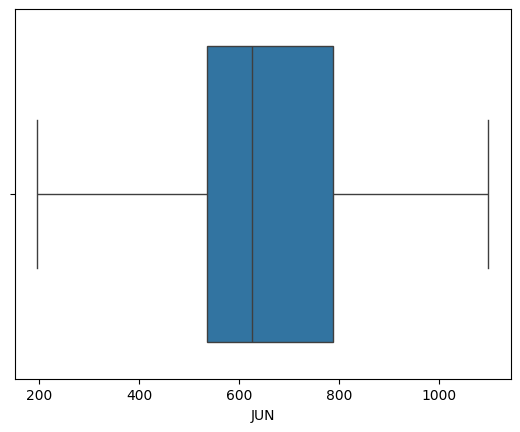

In [3]:
sns.boxplot(x = df['JUN'])

Assumption:
- If the amount of rain is above the median value, I will consider it as heavy rainfall.

In [4]:
df['JUN_H'] = df['JUN'].apply(lambda x: 'Yes' if x>df['JUN'].median() else 'NO')

In [5]:
df.head()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL RAINFALL,FLOODS,JUN_H
0,KERALA,1901,28.7,44.7,51.6,160.0,174.7,824.6,743.0,357.5,197.7,266.9,350.8,48.4,3248.6,YES,Yes
1,KERALA,1902,6.7,2.6,57.3,83.9,134.5,390.9,1205.0,315.8,491.6,358.4,158.3,121.5,3326.6,YES,NO
2,KERALA,1903,3.2,18.6,3.1,83.6,249.7,558.6,1022.5,420.2,341.8,354.1,157.0,59.0,3271.2,YES,NO
3,KERALA,1904,23.7,3.0,32.2,71.5,235.7,1098.2,725.5,351.8,222.7,328.1,33.9,3.3,3129.7,YES,Yes
4,KERALA,1905,1.2,22.3,9.4,105.9,263.3,850.2,520.5,293.6,217.2,383.5,74.4,0.2,2741.6,NO,Yes


In [7]:
pd.crosstab(index = df['FLOODS'], columns = df['JUN_H'], margins = True)

JUN_H,NO,Yes,All
FLOODS,,,
NO,42,16,58
YES,17,43,60
All,59,59,118


- Q: Find Joint and Marginal Probabilities

In [9]:
pd.crosstab(index = df['FLOODS'], columns = df['JUN_H'], normalize = True, margins = True)

JUN_H,NO,Yes,All
FLOODS,,,
NO,0.355932,0.135593,0.491525
YES,0.144068,0.364407,0.508475
All,0.500000,0.500000,1.000000


- p(floods = Yes and June Heavy = Yes) = 0.364
- p(floods = Yes and June Heavy = No) = 0.144
- p(floods = No and June Heavy = Yes) = 0.1355
- p(floods = No and June Heavy = No) = 0.355


- p(floods = Yes) = 0.50
- p(floods = No) = 0.49
- p(June Heavy = Yes) = 0.5
- p(June Heavy = No) = 0.5

In [10]:
pd.crosstab(index = df['FLOODS'], columns = df['JUN_H'], margins = True)

JUN_H,NO,Yes,All
FLOODS,,,
NO,42,16,58
YES,17,43,60
All,59,59,118


In [11]:
pd.crosstab(index = df['FLOODS'], columns = df['JUN_H'], normalize = 'columns')

JUN_H,NO,Yes
FLOODS,,
NO,0.711864,0.271186
YES,0.288136,0.728814


- p(Flood = Yes | June Heavy = Yes) = 0.72
- p(Flood = No | June Heavy = No) = 0.711
- p(Flood = Yes | June Heavy = No) = 0.288
- p(Flood = No | June Heavy = Yes) = 0.27


In [12]:
pd.crosstab(index = df['FLOODS'], columns = df['JUN_H'], margins = True)

JUN_H,NO,Yes,All
FLOODS,,,
NO,42,16,58
YES,17,43,60
All,59,59,118


In [13]:
pd.crosstab(index = df['FLOODS'], columns = df['JUN_H'], normalize = 'index')

JUN_H,NO,Yes
FLOODS,,
NO,0.724138,0.275862
YES,0.283333,0.716667


- p(June_Heavy = YES | Floods = Yes) = 0.71
- p(June Heavy = No | Floods = No) = 0.72

**Can we say that the floods are dependent on whether it rained heavily in the month June or not?**

- p(flood = Yes | June_Heavy = Yes) = 0.72
- p(Flood = Yes) = 0.5

In [14]:
df['FLOODS'].value_counts()

YES    60
NO     58
Name: FLOODS, dtype: int64

In [15]:
df['FLOODS'].value_counts(normalize = True)

YES    0.508475
NO     0.491525
Name: FLOODS, dtype: float64